# Cross correlation of DTOCs and ED Breaches

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_dtoc = pd.read_csv('dtoc.csv')
df_dtoc.shape

(80, 10)

In [3]:
df_dtoc.head()

,year,month,total_atten,total_atten_t1,total_atten_>4hr,95%_targ,total_admissions,dtoc_a,dtoc_na,dtoc_total
0,2010-11,August,1719197.000,1138652.000,33184.00000,0.980698,425702.0000,2559,2381,4940
1,2010-11,September,1715117.000,1150728.000,41151.00000,0.976007,424900.0000,2647,2357,5004
2,2010-11,October,1753934.000,1163143.000,47414.00000,0.972967,436215.0000,2513,2075,4588
3,2010-11,November,1604591.000,1111294.571,46436.42857,0.971060,429099.0000,2352,2057,4409
4,2010-11,December,1647823.857,1159203.857,89917.28571,0.945433,452728.7143,1995,1866,3861


dickey fuller test of stationarity

Notes: both are ns - this means that they are non-stationary

In [4]:
def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [5]:
check_stationarity(df_dtoc['total_atten_>4hr'])

ADF Statistic: -1.529597
p-value: 0.518823
	5%: -2.899
	10%: -2.587
	1%: -3.516


In [6]:
check_stationarity(df_dtoc['dtoc_total'])

ADF Statistic: 0.603833
p-value: 0.987710
	5%: -2.906
	10%: -2.590
	1%: -3.532


Difference time series

In [7]:
breaches_diff = df_dtoc['total_atten_>4hr'].diff()
dtoc_total_diff = df_dtoc['dtoc_total'].diff()

In [8]:
check_stationarity(breaches_diff.loc[breaches_diff.index > 0])

ADF Statistic: -3.591030
p-value: 0.005935
	5%: -2.904
	10%: -2.590
	1%: -3.529


In [9]:
check_stationarity(dtoc_total_diff.loc[dtoc_total_diff.index > 0])

ADF Statistic: -1.538870
p-value: 0.514203
	5%: -2.906
	10%: -2.590
	1%: -3.532


In [18]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is EE63-178E

 Directory of C:\Users\bjk1y13\OneDrive - University of Southampton\MH000_DTOC\Example_Cross_Correlation

24/05/2018  11:29    <DIR>          .
24/05/2018  11:29    <DIR>          ..
23/05/2018  13:58             1,307 .gitignore
24/05/2018  10:58    <DIR>          .ipynb_checkpoints
23/05/2018  13:58             6,782 dtoc.csv
24/05/2018  11:29           287,417 dtoc_cross_correlation-bk_version.ipynb
24/05/2018  10:32            89,126 dtoc_cross_correlation.ipynb
23/05/2018  13:58             1,108 LICENSE
23/05/2018  13:58               100 README.md
               6 File(s)        385,840 bytes
               3 Dir(s)  361,415,647,232 bytes free


Still non-stationary!

Cross correlation

In [16]:
corr = signal.correlate(breaches_diff.loc[breaches_diff.index > 0], dtoc_total_diff.loc[dtoc_total_diff.index > 0], mode='same')
corr = corr/np.max(corr)

In [17]:
corr

array([-0.031095  , -0.20335956,  0.38459396, -0.41261818,  0.11130306,
        0.08577231,  0.08838375, -0.06729572,  0.11161554, -0.09704551,
        0.0390094 ,  0.07925815, -0.06982432, -0.27707208,  0.84150052,
       -0.76577347,  0.09994513,  0.27966684,  0.24253224, -0.22504499,
        0.15192814,  0.14108554, -0.05345219,  0.0500672 ,  0.00137918,
       -0.39929243,  0.60789204, -0.5964866 ,  0.24174293,  0.45461113,
       -0.59752776,  0.47416062, -0.01633332,  0.34906168, -0.19310959,
        0.06435728,  0.05572599, -0.42949033,  1.        , -0.52156085,
       -0.32759322,  0.52430483, -0.00795537,  0.26503555, -0.0620705 ,
        0.20753387, -0.14547037,  0.00873971,  0.14086149, -0.44777185,
        0.29784979, -0.23123086, -0.15053325,  0.51757893, -0.48970572,
        0.43231282, -0.03956975,  0.150028  , -0.12616957,  0.19795209,
       -0.08280844, -0.17151977,  0.36496027, -0.27481595, -0.39137023,
        0.56892455, -0.2866285 ,  0.06749632, -0.09419779,  0.38

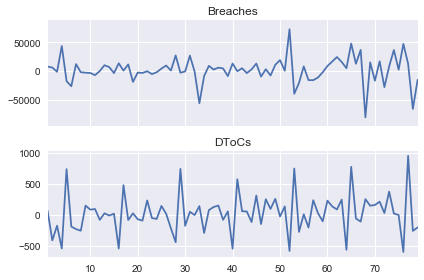

In [14]:
fig, (ax_breaches, ax_dtocs) = plt.subplots(2, 1, sharex=True)
ax_breaches.plot(breaches_diff.loc[breaches_diff.index > 0])
ax_breaches.set_title('Breaches')
ax_dtocs.plot(dtoc_total_diff.loc[dtoc_total_diff.index > 0])
ax_dtocs.set_title('DToCs')
ax_breaches.margins(0, 0.1)
fig.tight_layout()


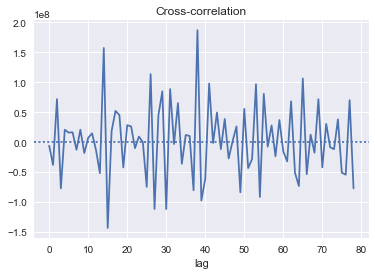

In [15]:
fig, ax_corr = plt.subplots(1, 1, sharex=True)
ax_corr.plot(corr)
ax_corr.set_title('Cross-correlation')
ax_corr.set_xlabel('lag')
ax_corr.axhline(0.0, ls=':')

Notes:
Might need to take 2nd difference.

Note sure what you do about interpretation of significance?